<a href="https://colab.research.google.com/github/sharifkaiser/DL_colab/blob/master/facial_expression_tx_learn_5_emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install kaggle # api for downloading dataset
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 1.x
except Exception:
  pass

import tensorflow as tf

In [ ]:
# strategy: I have uploaded the csv file to google drive, then mounted 
# drive in colab and then converted csv file into images
# mount google drive in colab
from google.colab import drive
drive.mount('/content/drive') # this is saved under /content/drive dir

!ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
drive  sample_data


In [ ]:
# convert from csv to image
import os
import argparse
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image

# initialize global variables
TRAIN_DIR = ''
TEST_DIR = ''

# declare dictionary for readability
Emotion = {
    0: 'angry',
    # 1: 'disgust',
    # 2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'surprise',
    6: 'neutral'
}

# kaggle facial expression recognition dataset contains 48*48 pixel greyscale images
IMG_WIDTH = 48
IMG_HEIGHT = 48


def csv_to_images(source):

    data = pd.read_csv(source)  # read file
    # see_data(data)    # see the csv data to get an idea
    _make_dir()
 
    for index, row in data.iterrows():
      if ((int(row['emotion']) != 1) and (int(row['emotion']) != 2)):  # exclude disgust and fear
        img =_create_img(row['pixels'])

        # Save image under training folder
        # python does not have switch case, so use if elif !
        img_path = get_img_dir(int(row['emotion']), row['Usage'], index)
        img.save(img_path)

def _create_img(pixels):
    array_pixel = str(pixels).split()    # contains list of strings
    array = np.array(array_pixel, dtype=np.uint8)   # convert list to array(8bit int) since all pixels are unsigned ints
    array = array.reshape((IMG_WIDTH, IMG_HEIGHT))  # reshape to make proper dimensions
    
    # fromarray modes ref: https://pillow.readthedocs.io/en/3.1.x/handbook/concepts.html#concept-modes
    return Image.fromarray(array, 'L')   # create image, L means 8 bit pixels, grey
    # img.save('my.png')
    # img.show()
def get_img_dir(emotion_type, img_type, index):
    parent_dir = '' # default value
    if str(img_type) == 'Training':
        parent_dir = TRAIN_DIR
        # save image inside train directory
    else:
        parent_dir = TEST_DIR
        # save image inside test directory

    subdir_name = Emotion[emotion_type]
    return os.path.join(parent_dir, subdir_name + "/" + str(index) +".png")

def see_data(data):
    print(data.head) # to see the data, has 3 cols: emotion, pixels, Usage
    # see unique values for emotion and usage column to understand what's going on
    print(data.emotion.unique())    # 0,1,2,3,4,5,6 => 7 emotions in total
    print(data.Usage.unique())  # Training, PublicTest, PrivateTest
    print(data.groupby(['Usage']).size()) # PrivateTest 3589, PublicTest 3589, Training 28709
    # From above commented code, we see 20% test data(private and public), and 80% train data.
    
    pixels = data.head(1).pixels   # array that contains pixel values of the first 10 rows
    for row in pixels:
        print(len(str(row).split()))    # 2304 pixels per row = 48*48 (split returns a list)

def _make_dir():
    ##################################################################################
    # from kaggle dataset, the emotions are: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
    # We will create directory like below:
    # face_images/
    #     train/
    #         angry/
    #         disgust/
    #         fear/
    #         happy/
    #         neutral/
    #         sad/
    #         surprise/
    #     test/
    #         angry/
    #         disgust/
    #         fear/
    #         happy/
    #         neutral/
    #         sad/
    #         surprise/
    ##################################################################################

    current_file_path = os.path.dirname(Path().absolute()) # in colab, __file__ does not work: https://stackoverflow.com/questions/3430372/how-do-i-get-the-full-path-of-the-current-files-directory
    base_dir = os.path.join(current_file_path, "face_images_5") # first argument is an absolute path
    global TRAIN_DIR, TEST_DIR  # global keyword is used to make chnages to the global var
    TRAIN_DIR = os.path.join(base_dir, "train/")
    TEST_DIR = os.path.join(base_dir, "test/")
    
    # Create train directories
    # ref for Path: https://docs.python.org/3/library/pathlib.html#pathlib.PurePath
    # parents=true means missing parents will be added, exist_ok true means it does not throw exception if dir already exists
    Path(TRAIN_DIR + "angry/").mkdir(parents=True, exist_ok=True)
    # Path(TRAIN_DIR + "disgust/").mkdir(parents=True, exist_ok=True)
    # Path(TRAIN_DIR + "fear/").mkdir(parents=True, exist_ok=True)
    Path(TRAIN_DIR + "happy/").mkdir(parents=True, exist_ok=True)
    Path(TRAIN_DIR + "neutral/").mkdir(parents=True, exist_ok=True)
    Path(TRAIN_DIR + "sad/").mkdir(parents=True, exist_ok=True)
    Path(TRAIN_DIR + "surprise/").mkdir(parents=True, exist_ok=True)

    # Create test directories
    Path(TEST_DIR + "angry/").mkdir(parents=True, exist_ok=True)
    # Path(TEST_DIR + "disgust/").mkdir(parents=True, exist_ok=True)
    # Path(TEST_DIR + "fear/").mkdir(parents=True, exist_ok=True)
    Path(TEST_DIR + "happy/").mkdir(parents=True, exist_ok=True)
    Path(TEST_DIR + "neutral/").mkdir(parents=True, exist_ok=True)
    Path(TEST_DIR + "sad/").mkdir(parents=True, exist_ok=True)
    Path(TEST_DIR + "surprise/").mkdir(parents=True, exist_ok=True)

##

print('before creating images')
csv_to_images('/content/drive/My Drive/dataset/fer2013.csv')  # this file exists in my google drive
print('success!')

before creating images
success!


In [ ]:
# # configure kaggle api, it is not necessary in PC. 
# # For ubuntu e.g. local PC, just copy paste kaggle.json file in ~/.kaggle/
# !mkdir ~/.kaggle
# !touch ~/.kaggle/kaggle.json
# api_token = {"username":"akmsharifkaiser","key":"8c9a04ae5b876fb2b196e76064a3afd6"}

# import json

# with open('/root/.kaggle/kaggle.json', 'w') as file:
#     json.dump(api_token, file)

# !chmod 600 ~/.kaggle/kaggle.json



Using TensorFlow backend.


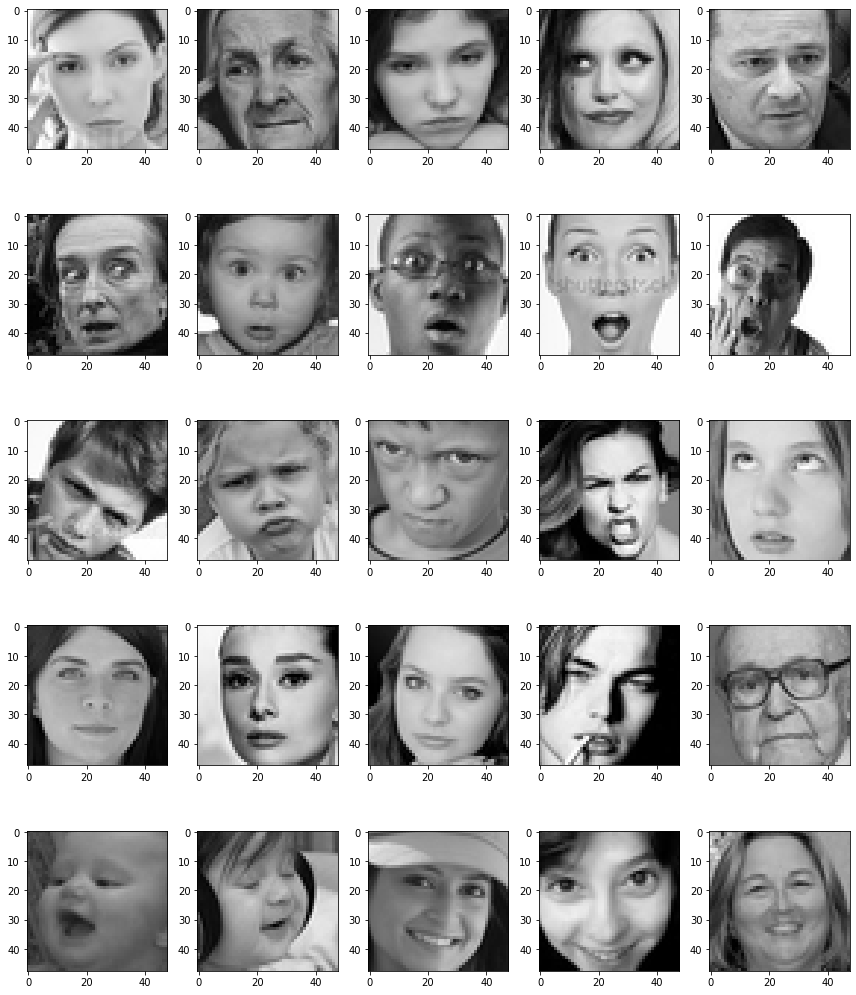

4830 sad images
3171 surprise images
3995 angry images
4965 neutral images
7215 happy images


In [ ]:
# For testing: display some images for every different expression to see if data is OK

import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
BASE_DIR = "../face_images_5/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(BASE_DIR + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(BASE_DIR + "train/" + expression + "/" +os.listdir(BASE_DIR + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

# count number of train images for each expression
for expression in os.listdir(BASE_DIR + "train"):
    print(str(len(os.listdir(BASE_DIR + "train/" + expression))) + " " + expression + " images")


In [ ]:
# This code block does image augmentation on train images to get better result
# augmentation like random rotation, flip, zoom etc. gives more variety to the model,
# which helps to the fact that model is not memorizing images
# Augmented data directory is the same as train and test directory, the model will 
# run many times and each time it will see a randomly augmented image which will 
# ease generalizing the train data
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 32
# IMAGE_RES = 48  # for this dataset img shape is 48*48
IMAGE_RES = 299 # for inception v3
# IMAGE_RES = 224 # for mobilenet v2

TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')


# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

image_gen_train = ImageDataGenerator(
  rescale=1./255, # rescaling is necessary, ref: https://www.linkedin.com/pulse/keras-image-preprocessing-scaling-pixels-training-adwin-jahn
  rotation_range=45,
  width_shift_range=0.10,
  height_shift_range=0.10,
  shear_range=0.1,
  horizontal_flip=True,
  fill_mode='nearest'
)
image_gen_val = ImageDataGenerator(rescale=1./255) 

# Try with no augmentation
# image_gen_train = ImageDataGenerator(rescale=1./255)
# image_gen_val = ImageDataGenerator(rescale=1./255)

# Put It All Together
train_data_gen = image_gen_train.flow_from_directory(
  batch_size=BATCH_SIZE,
  directory=TRAIN_DIR,
  shuffle=True,
  target_size=(IMAGE_RES,IMAGE_RES),
  classes = ['angry','happy','neutral', 'sad', 'surprise'],
  color_mode='rgb', # will be converted to 3 channels, for transfer learning
  class_mode='sparse' # will be 1D integer labels
)

augmented_images = [train_data_gen[0][0][1] for i in range(5)]
# augmented_images = [format(train_data_gen.shape[2]) for i in range(5)]
# plotImages(augmented_images)  # See the results

# Create a Data Generator for the Validation Set
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=TEST_DIR,
    shuffle=True,
    target_size=(IMAGE_RES, IMAGE_RES),
    classes = ['angry', 'happy','neutral', 'sad', 'surprise'],
    color_mode='rgb', # will be converted to 3 channels
    class_mode='sparse', # for transfer learning
  )

# print(len(list(train_data_gen)))
# train_data_gen is a tuples of (x, y) where x is a numpy array containing a batch of images
# with shape (batch_size, *target_size, channels) and 
# y is a numpy array of corresponding labels.

# count number of train images for each expression
for expression in os.listdir(BASE_DIR + "train"):
    print(str(len(os.listdir(BASE_DIR + "train/" + expression))) + " " + expression + " images")


Found 24176 images belonging to 5 classes.
Found 6043 images belonging to 5 classes.
4830 sad images
3171 surprise images
3995 angry images
4965 neutral images
7215 happy images


In [ ]:
# Train using transfer learning, both mobilenet and inception gave very big loss ~1.5
import tensorflow_hub as hub

# We will use transfer learning: inceptionv3
EPOCHS = 20

# This code is for reusing inception v3 pretrained model
URL = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4"
feature_extractor = hub.KerasLayer(
                                    URL, 
                                    input_shape=(IMAGE_RES, IMAGE_RES, 3) # 3 means RGB
                                   )

# This code is for reusing mobilenet v2 pretrained model

# URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# feature_extractor = hub.KerasLayer(
#                                     URL, 
#                                     input_shape=(IMAGE_RES, IMAGE_RES, 3)
#                                    )

feature_extractor.trainable = False # freeze the pretrained model

# Attach classification head
model = tf.keras.Sequential()
model.add(feature_extractor)
model.add(tf.keras.layers.Dense(7, activation='softmax'))

# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
# following code saves if validation accuracy increases from past history
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# notice that we do not need to use steps_per_epoch here 
# since that is handled inside the already trained model
history = model.fit_generator(
    generator=train_data_gen,
    steps_per_epoch=train_data_gen.n//train_data_gen.batch_size,
    epochs=EPOCHS,
    validation_data = val_data_gen,
    validation_steps = val_data_gen.n//val_data_gen.batch_size,
    callbacks=callbacks_list
  )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Epoch 1/20
188/755 [======>.......................] - ETA: 55s - loss: 1.3543 - acc: 0.4317
Epoch 00001: val_acc improved from -inf to 0.43168, saving model to model_weights.h5
755/755 [==============================] - 470s 622ms/step - loss: 1.4438 - acc: 0.3885 - val_loss: 1.3543 - val_acc: 0.4317
Epoch 2/20
188/755 [======>.......................] - ETA: 48s - loss: 1.3095 - acc: 0.4624
Epoch 00002: val_acc improved from 0.43168 to 0.46243, saving model to model_weights.h5
755/755 [==============================] - 458s 607ms/step - loss: 1.3621 - acc: 0.4329 - val_loss: 1.3095 - val_acc: 0.4624
Epoch 3/20
188/755 [======>.......................] - ETA: 48s - loss: 1.2836 - acc: 0.4812
Epoch 00003: val_acc improved from 0.46243 to 0.48122, saving model to model_weights.h5
755/755 [==============================] - 454s 602ms/step - loss: 1.3319 - acc: 0.4464 - val_loss: 1.2836 - val_acc: 0.4812
Epoch 4/20
188/755 [======>.......................] - ETA: 48s - loss: 1.2309 - acc: 0.5

# TODO: Plot Training and Validation Graphs

In the cell below, plot the training and validation accuracy/loss graphs.

NameError: ignored

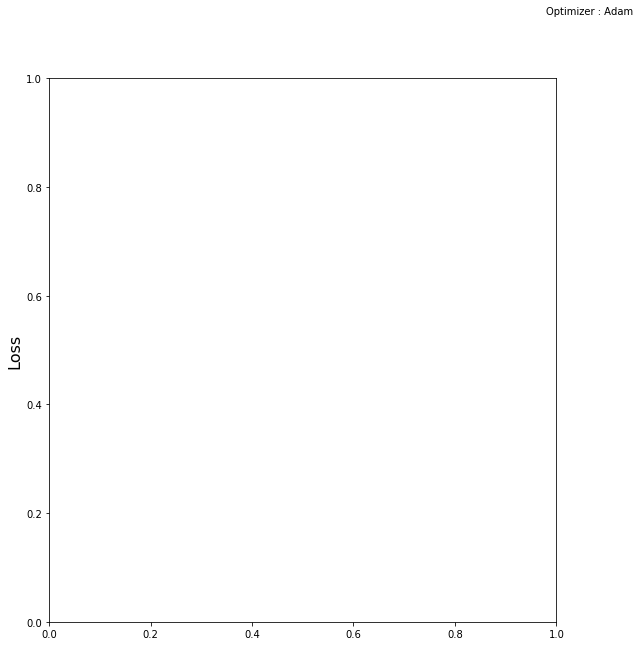

In [ ]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


What is a bit curious here is that validation performance is better than training performance, right from the start to the end of execution.

One reason for this is that validation performance is measured at the end of the epoch, but training performance is the average values across the epoch.

The bigger reason though is that we're reusing a large part of MobileNet which is already trained on Flower images. 

For both mobilenet and inception, after 1 epoch, divergence happens

# TODO: Check Predictions

In the cell below get the label names from the `dataset info` and convert them into a NumPy array. Print the array to make sure you have the correct label names.

In [ ]:
# print(dataset_info.compute_dynamic_properties)

# the following line makes a list class_names, but list cannot be accessed
# via index, so it is better we convert it to numpy array in next line
class_names = dataset_info.features['label'].names
class_names = np.array(class_names)
class_names

### TODO: Create an Image Batch and Make Predictions

In the cell below, use the `next()` function to create an `image_batch` and its corresponding `label_batch`. Convert both the `image_batch` and `label_batch` to numpy arrays using the `.numpy()` method. Then use the `.predict()` method to run the image batch through your model and make predictions. Then use the `np.argmax()` function to get the indices of the best prediction for each image. Finally convert the indices of the best predictions to class names.

In [ ]:
# next() function to manually iterate through all the items of an iterator
# the following line will take only first entry of train_batches
# since the batch contains 32 entries, it will print only first 32 entries
image_batch, label_batch = next(iter(train_batches))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)  # returns numpy arrays of prediction
# predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
# predicted_ids
# if class_names is a list, it cannot be accassed via index
# so better to convert class_names into a numpy array before
predicted_class_names = class_names[predicted_ids]
predicted_class_names


### TODO: Print True Labels and Predicted Indices

In the cell below, print the true labels and the indices of predicted labels.

In [ ]:
print()

# Plot Model Predictions

In [ ]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")